
**Ajinkya Sunil Patil (42)**


**Exp No.:04**

**Aim:** **Implementation of Statistical Hypothesis Test using Scipy and Sci-kit learn.**

In [ ]:
import pandas as pd
from scipy import stats

# Load the dataset
df = pd.read_csv('fixed_data.csv')

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14246 entries, 0 to 14245
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           14246 non-null  float64
 1   is_canceled                     14246 non-null  float64
 2   lead_time                       14246 non-null  float64
 3   arrival_date_year               14246 non-null  float64
 4   arrival_date_month              14246 non-null  float64
 5   arrival_date_week_number        14246 non-null  float64
 6   arrival_date_day_of_month       14246 non-null  float64
 7   stays_in_weekend_nights         14246 non-null  float64
 8   stays_in_week_nights            14246 non-null  float64
 9   adults                          14246 non-null  float64
 10  children                        14246 non-null  float64
 11  babies                          14246 non-null  float64
 12  meal                            

In [ ]:
pearson_corr, p_value = stats.pearsonr(df['lead_time'], df['adr'])
print(f"Pearson Correlation: {pearson_corr:.3f}, p-value: {p_value:.3f}")

Pearson Correlation: -0.062, p-value: 0.000


In [ ]:
spearman_corr, p_value = stats.spearmanr(df['lead_time'], df['adr'])
print(f"Spearman Correlation: {spearman_corr:.3f}, p-value: {p_value:.3f}")

Spearman Correlation: 0.002, p-value: 0.813


In [ ]:
kendall_corr, p_value = stats.kendalltau(df['lead_time'], df['adr'])
print(f"Kendall's Tau: {kendall_corr:.3f}, p-value: {p_value:.3f}")

Kendall's Tau: -0.000, p-value: 0.948


In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(df['is_canceled'], df['meal'])

# Perform Chi-Squared Test
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-Squared Statistic: {chi2_stat:.3f}, p-value: {p_val:.3f}")

Chi-Squared Statistic: 116.908, p-value: 0.000


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr, kendalltau, chi2_contingency
from sklearn.feature_selection import chi2

# Load dataset
df = pd.read_csv('fixed_data.csv')

# Step 1: Data Cleaning
# Convert columns to integers where appropriate
int_cols = ['hotel', 'is_canceled', 'arrival_date_year', 'arrival_date_month',
            'arrival_date_week_number', 'arrival_date_day_of_month',
            'stays_in_weekend_nights', 'stays_in_week_nights', 'adults',
            'children', 'babies', 'country', 'is_repeated_guest',
            'previous_cancellations', 'previous_bookings_not_canceled',
            'reserved_room_type', 'assigned_room_type', 'booking_changes',
            'days_in_waiting_list', 'required_car_parking_spaces',
            'total_of_special_requests', 'reservation_status']
df[int_cols] = df[int_cols].astype(int)

# Fix invalid 'adr' values (replace 0 with median)
df['adr'] = df['adr'].replace(0, np.nan)
df['adr'] = df['adr'].fillna(df['adr'].median())

# Drop reservation_status_date (encoded incorrectly)
df = df.drop(columns=['reservation_status_date'])

# Step 2: Correlation Tests
# Select numerical variables
numerical_vars = ['lead_time', 'adr', 'stays_in_weekend_nights',
                  'stays_in_week_nights', 'adults', 'previous_cancellations',
                  'previous_bookings_not_canceled', 'booking_changes',
                  'days_in_waiting_list', 'total_of_special_requests']
corr_df = df[numerical_vars]

# Compute correlation matrices
pearson_corr = corr_df.corr(method='pearson')
spearman_corr = corr_df.corr(method='spearman')
kendall_corr = corr_df.corr(method='kendall')

# Plot heatmaps
def plot_heatmap(corr_matrix, title):
    plt.figure(figsize=(7, 4))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
    plt.title(title)
    plt.show()

# Identify columns with no correlation (all values the same or NaN)
no_correlation_cols = pearson_corr.columns[(pearson_corr.nunique() == 1) | pearson_corr.isna().all()]

# Remove these columns from the correlation matrices
filtered_pearson_corr = pearson_corr.drop(columns=no_correlation_cols, index=no_correlation_cols)
filtered_spearman_corr = spearman_corr.drop(columns=no_correlation_cols, index=no_correlation_cols)
filtered_kendall_corr = kendall_corr.drop(columns=no_correlation_cols, index=no_correlation_cols)



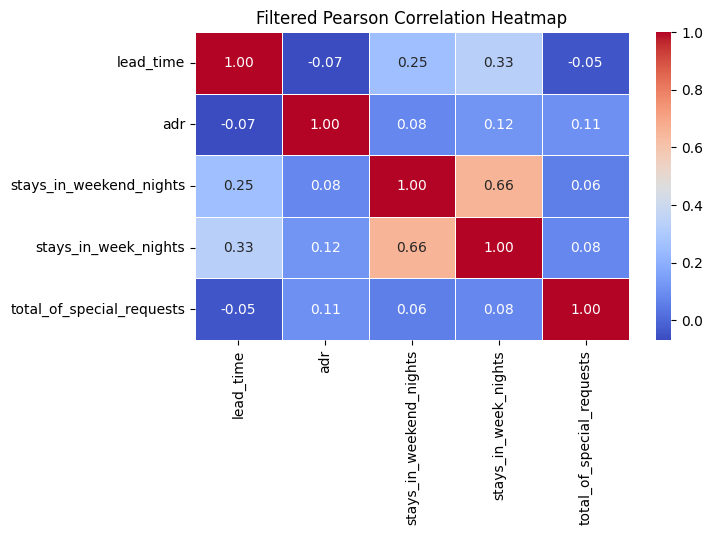

In [ ]:
# Plot updated heatmaps
plot_heatmap(filtered_pearson_corr, "Filtered Pearson Correlation Heatmap")

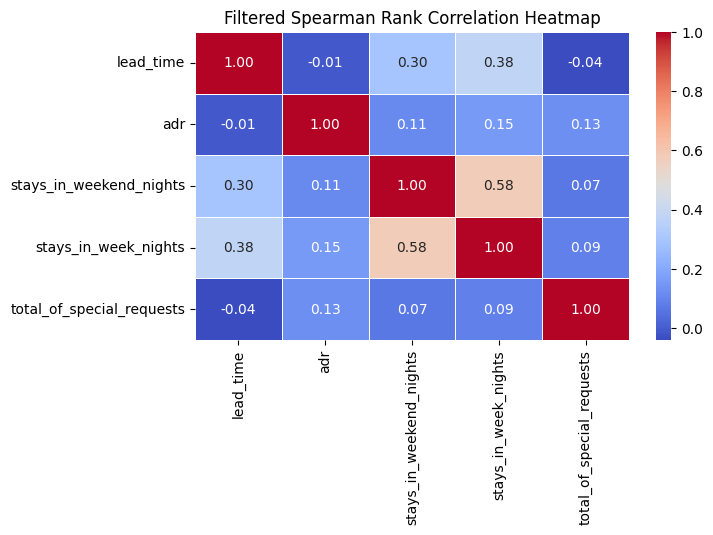

In [ ]:
plot_heatmap(filtered_spearman_corr, "Filtered Spearman Rank Correlation Heatmap")

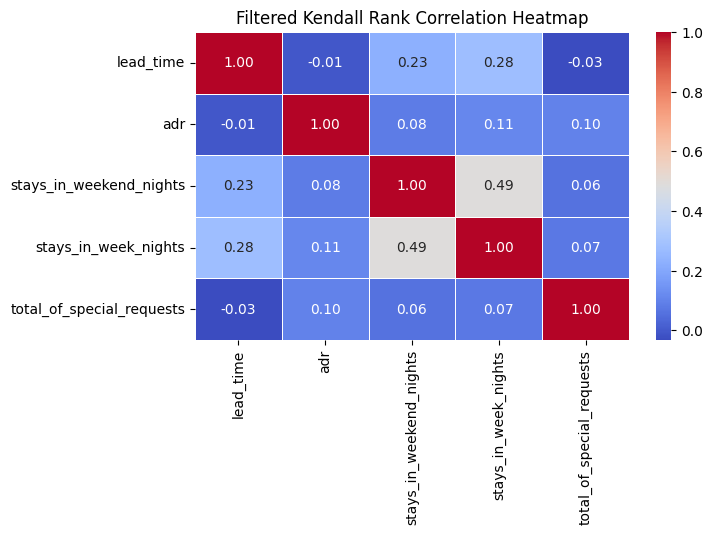

In [ ]:
plot_heatmap(filtered_kendall_corr, "Filtered Kendall Rank Correlation Heatmap")

In [ ]:
# Print removed columns
print("Removed columns with no correlation:", no_correlation_cols.tolist())



Removed columns with no correlation: ['adults', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list']


In [ ]:
# Step 3: Chi-Squared Test
# Select categorical variables
categorical_vars = ['is_canceled', 'hotel', 'meal', 'country', 'market_segment',
                    'distribution_channel', 'reserved_room_type', 'deposit_type',
                    'customer_type', 'reservation_status']

In [ ]:
# SciPy Chi-Squared Test (example for 'is_canceled' vs 'hotel')
contingency_table = pd.crosstab(df['is_canceled'], df['hotel'])
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
print(f"SciPy Chi-Squared Test: Stat={chi2_stat:.2f}, p-value={p_val:.4f}")

SciPy Chi-Squared Test: Stat=0.00, p-value=1.0000


In [ ]:
# Scikit-learn Chi-Squared Test (requires features and target)
X = df[categorical_vars].astype(int)
y = df['is_canceled']  # Example target variable

chi2_scores, p_values = chi2(X, y)
print("\nScikit-learn Chi-Squared Scores:")
for idx, col in enumerate(categorical_vars):
    print(f"{col}: Score={chi2_scores[idx]:.2f}, p-value={p_values[idx]:.4f}")


Scikit-learn Chi-Squared Scores:
is_canceled: Score=4106.00, p-value=0.0000
hotel: Score=nan, p-value=nan
meal: Score=63.67, p-value=0.0000
country: Score=6022.75, p-value=0.0000
market_segment: Score=282.73, p-value=0.0000
distribution_channel: Score=0.00, p-value=1.0000
reserved_room_type: Score=324.47, p-value=0.0000
deposit_type: Score=nan, p-value=nan
customer_type: Score=0.00, p-value=1.0000
reservation_status: Score=8128.29, p-value=0.0000
